# Zillow's Data Cleanup

### Group: Jonathan Chadi, Vijay Das, Andrew Kosturos

### Notebook Outline:

For our project we used data exclusively from Zillow. Zillow provides real estate rental and sales data for the United States. Throughout our data collection and analysis, we chose to analyze data on the metro level instead of city, state, or country wide. We believe that American cities widely differ in their level of centralization and density. For example New York City is a densely populated and centralized city whereas Boston is comprised of a set of neighborhoods that may lie outside city limits but are still connected by the T. Therefore metro areas should encompass the economic impacts within a defined subset of the country. Within this constraint we used measures including median sales price/ sqft, rent/ sqft, negative equity, foreclosures adjusted by number of homes in a region, age of inventory, and the median price reduction. We used a Jupyter Notebook to read the CSVs and clean the data. After this step is completed, we will begin to create analysis using Pandas, Matplotlib, Ploty, and Seaborn


## Import Packages

In [2]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
from pandas_datareader import wb, data as web  # worldbank data

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

import scipy as scipy
from scipy import stats
from scipy.stats import mstats
from scipy.stats.mstats import gmean

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode(connected=True)

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.18.1
Plotly version:  1.12.11
Today:  2016-12-20


# Data Set Analysis/Cleanup

 The next six code boxes consist of pulling Median Sale Price data, Negative Equity Data, Home Foreclosed per 10,000, Median Price Cut (%), Rent/Sq Ft, and Inventory Age data for further analysis and charting. 

## Median Sold Price

In [3]:
#Median Sold Price
url1 = 'http://files.zillowstatic.com/research/public/'
url2 = 'Metro/Metro_MedianSoldPrice_AllHomes.csv' # Url Download Address of Data Source
url  = url1 + url2        # location of file

sale_price = pd.read_csv(url)     # read file and assign it to df_saleprice

sale_price = sale_price.drop(['RegionID', 'SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
sale_price = sale_price.set_index('RegionName')
sale_price = sale_price.groupby(pd.PeriodIndex(sale_price.columns, freq='Q'), axis=1).mean()
sale_price3 = sale_price.T
sale_price3 = sale_price3['United States']
sale_price3 = sale_price3.to_frame('United States')
sale_price3.tail(10)

,United States
2014Q1,182057.650000
2014Q2,192457.916667
2014Q3,198811.333333
2014Q4,191050.000000
2015Q1,189916.666667
2015Q2,205333.333333
2015Q3,212425.000000
2015Q4,207325.000000
2016Q1,204516.666667
2016Q2,222658.333333


## Negative Equity

In [4]:
# Negative Equity

url3 = 'http://files.zillowstatic.com/research/public/NegativeEquity_2016Q2_Public.csv'
neg_equity = pd.read_csv(url3)

neg_equity = neg_equity[(neg_equity.RegionType == 'Metro') | 
                 (neg_equity.RegionType == 'Country')]

# Here, there were several region types outside of metro region
# We this code to remove any regional definitions except for 'Metro' and 'Country'

neg_equity = neg_equity.drop(['RegionID','RegionType','StateRegionID',
                                            'StateName','MSARegionID','MSA',
                                            'CountyRegionID','CountyName','CityRegionID',
                                            'City', 'SizeRank'], axis=1)

neg_equity = neg_equity.set_index('RegionName') # this is to set our index = RegionName

## Homes Foreclosed per 10k homes

In [5]:
# Homes Foreclosed per 10k homes

url4 = 'http://files.zillowstatic.com/research/public/Metro/'
url5 = 'Metro_HomesSoldAsForeclosures-Ratio_AllHomes.csv'
url4 = url4 + url5

foreclosure = pd.read_csv(url4)

#Because we got our data from a centralized source, we could use the same cleanup techniques

foreclosure = foreclosure.drop(['RegionID','SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
foreclosure = foreclosure.set_index('RegionName') # We wanted to set the index equal to the population size of metro areas
foreclosure = foreclosure.groupby(pd.PeriodIndex(foreclosure.columns, freq='Q'), axis=1).mean()

## Median Price Cut (%)

In [6]:
#Median Price Cut (%)

url5 = 'http://files.zillowstatic.com/research/public/Metro/Metro_'
url6 = 'MedianPctOfPriceReduction_AllHomes.csv'
url7 = url5 + url6

price_cut = pd.read_csv(url4)

# Because we got our data from a centralized source, we could use the same cleanup techniques
price_cut = price_cut.drop(['RegionID','SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
price_cut = price_cut.set_index('RegionName') # We wanted to set the index equal to the population size of metro areas
price_cut = price_cut.groupby(pd.PeriodIndex(price_cut.columns, freq='Q'), axis=1).mean()

## Rent/Sq. Foot

In [7]:
url6 = 'http://files.zillowstatic.com/research/public/Metro/Metro_ZriPerSqft_AllHomes.csv'
rent = pd.read_csv(url6)

rent = rent.set_index('RegionName')
rent = rent.drop(['RegionID','SizeRank'], axis = 1) # data clean up
rent = rent.groupby(pd.PeriodIndex(rent.columns, freq='Q'), axis=1).mean()

## Inventory Age

In [8]:
urlinv = 'http://files.zillowstatic.com/research/public/Metro/AgeOfInventory_Metro_Public.csv'
inv_age = pd.read_csv(urlinv)

inv_age = inv_age.drop(['RegionType','StateFullName','DataTypeDescription',],axis=1)
inv_age = inv_age.set_index('RegionName')
inv_age = inv_age.groupby(pd.PeriodIndex(inv_age.columns, freq='Q'), axis=1).mean()

## Calculating percentage change

In analyzing the data, we realized that the units were different for different data frames. Sales Price is measured in dollars, while negative equity data is listed as a percentage of total homes. Furthermore, inventory age is listed as a time period in months. The best way to standardize this was to get percentage changes in the data, and we therefore used a Pandas method called pct.change() to calculate this from a Series pulled from a data frame. The series pulled from all the dataframes is for the United States as a whole. 

In [9]:
sp_change = sale_price.T
sp_change = sp_change['United States']
sp_change = 100* sp_change.pct_change()

ne_change = neg_equity.T
ne_change = ne_change['United States']
ne_change = 100* ne_change.pct_change()

f_change = foreclosure.T
f_change = f_change['United States']
f_change = 100* f_change.pct_change()

rent_change = rent.T
rent_change = rent_change['United States']
rent_change.head(5)
rent_change = 100* rent_change.pct_change()

ia_change = inv_age.T
ia_change = ia_change['United States']
ia_change.head(5)
ia_change = 100* ia_change.pct_change()

# Where we go from here

Now that we have cleaned up the data a little bit, we are in a good place to move forward with our analysis. However, we should also note that we will have to do more data cleaning as we move forward depending on the type of analysis that we would want to make. For example, while most of the data is in monthly data, the negative equity data that we are using is in quarters, so we will have to adjust the data to fit that timeseries when the time comes. In addition, we also will have to merge some of our datasets and clean up any inconsistencies between the two that we merge. This would primarily be in ensuring that the data is the same acrosss the two samples. Given that we are not sure how many data samples we would like for each analysis, we have decided at this stage to not make this step of consolidation and merging quite yet, as we would like to wait and see if we should use as many data points as possible or just the ones that are consistent across all samples.

## Sale Price Data for all U.S. Metro Areas

This matplotlib plot consists of sales price data for every major United States metropolitan area. We were able to do this becaue using plt.subplots() every variable on a transposed sale_price data frame was plotted. Figure size, colors, labels, and titles were also set. This allows us to a macro time sereis analysis of median sales prices for all types of homes. The types of homes includes are single family residences of all room numbers, condominiums, and co-ops.

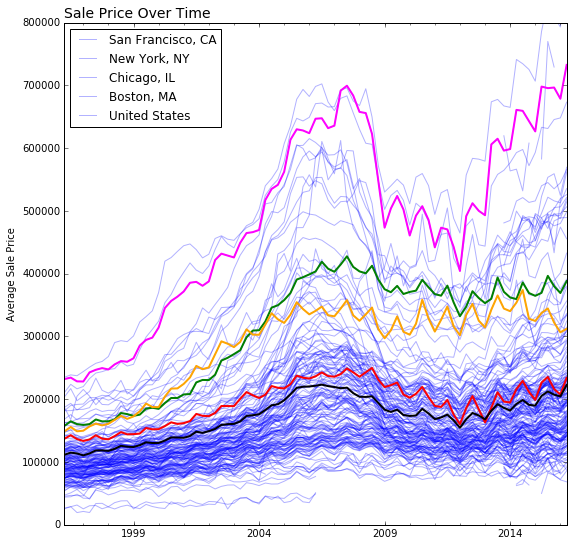

In [10]:
spq = sale_price.T

fig, ax = plt.subplots()
spq.plot(ax=ax, 
         figsize=(9,9),
         legend=True,
         color='blue', alpha=0.3, 
         ylim=(0,800000)
        )
ax.set_ylabel('Average Sale Price')
ax.set_xlabel('')
ax.set_title('Sale Price Over Time', fontsize=14, loc='left')
spq['San Francisco, CA'].plot(ax=ax, color='magenta', linewidth=2, alpha=3)
spq['New York, NY'].plot(ax=ax, color='green', linewidth=2, alpha = 3)
spq['Chicago, IL'].plot(ax=ax, color='red', linewidth=2, alpha = 3)
spq['Boston, MA'].plot(ax=ax, color='orange', linewidth=2, alpha = 3)
spq['United States'].plot(ax=ax, color='black', linewidth=2, alpha = 3)
ax.legend(['San Francisco, CA', 'New York, NY', 'Chicago, IL', 'Boston, MA', 'United States'], loc=0)

## Plot Quadrants with Foreclosure Rate and Sale Price Metrics

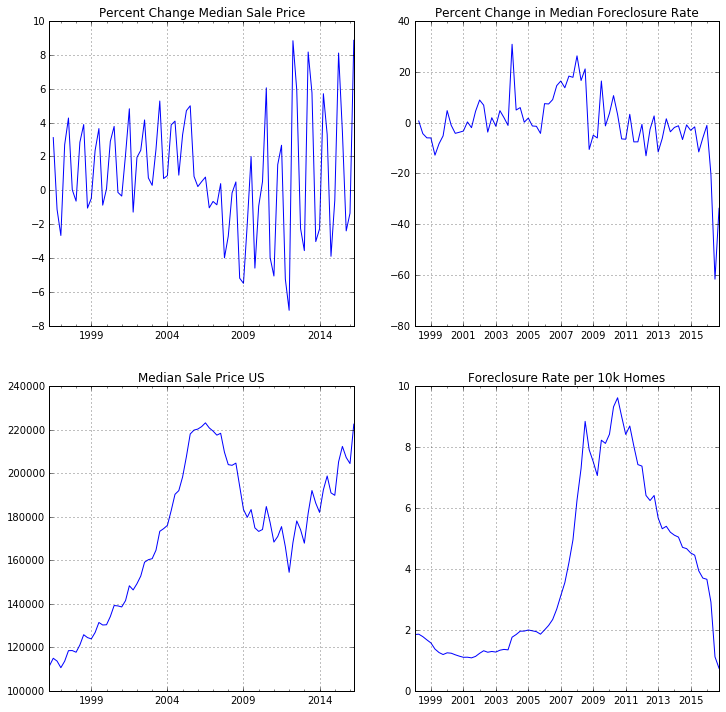

In [27]:
sale_price2 = sale_price.T
foreclosure2 = foreclosure.T
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
sp_change.plot(ax = ax[0,0], grid = True)
sale_price2['United States'].plot(ax = ax[1,0], grid = True)
foreclosure2['United States'].plot(ax = ax[1,1], grid = True)
f_change.plot(ax = ax[0,1], grid = True)

ax[0, 0].set_title('Percent Change Median Sale Price')
ax[1, 0].set_title('Median Sale Price US')
ax[1, 1].set_title('Foreclosure Rate per 10k Homes')
ax[0, 1].set_title('Percent Change in Median Foreclosure Rate')


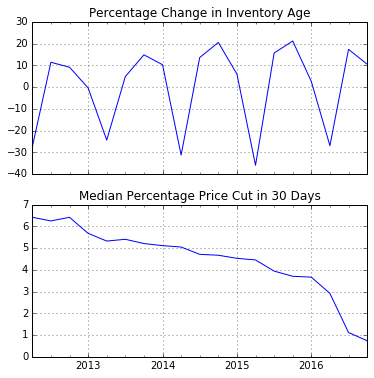

In [12]:
price_cut2 = price_cut.T
price_cut2 = price_cut2[57:]
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(6,6)
ia_change.plot(ax = ax[0], grid = True)
price_cut2['United States'].plot(ax = ax[1], grid = True)

ax[0].set_title('Percentage Change in Inventory Age')
ax[1].set_title('Median Percentage Price Cut in 30 Days')

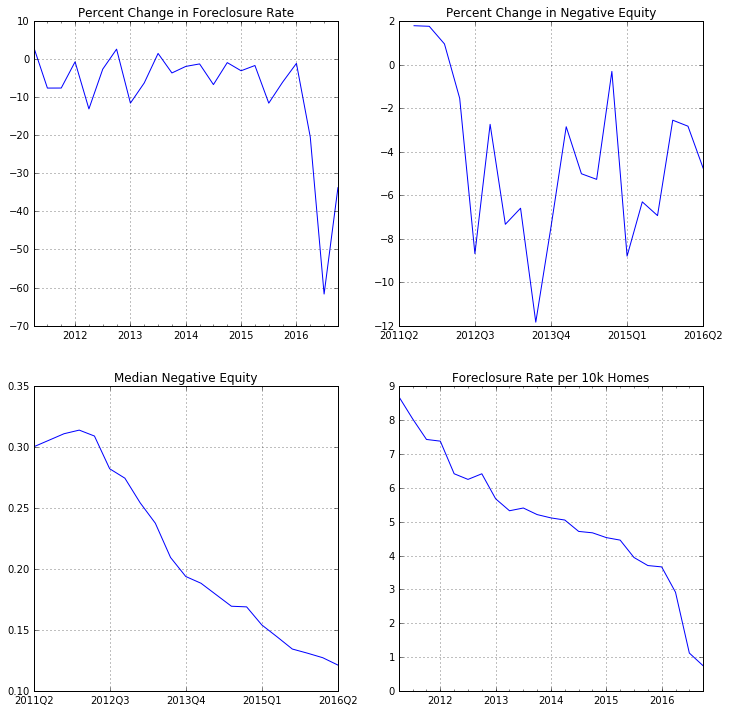

In [13]:
neg_equity2 = neg_equity.T
foreclosure2 = foreclosure.T
foreclosure2 = foreclosure2[53:]
f_change2 = f_change[53:]

fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
ne_change.plot(ax = ax[0,1], grid = True)
neg_equity2['United States'].plot(ax = ax[1,0], grid = True)
foreclosure2['United States'].plot(ax = ax[1,1], grid = True)
f_change2.plot(ax = ax[0,0], grid = True)

ax[0, 0].set_title('Percent Change in Foreclosure Rate')
ax[1, 0].set_title('Median Negative Equity')
ax[1, 1].set_title('Foreclosure Rate per 10k Homes')
ax[0, 1].set_title('Percent Change in Negative Equity')


# Merging Dataframes for Analysis

In [14]:
sp16Q2 = sale_price.xs("2016Q2", axis=1)
ne16Q2 = neg_equity.xs("2016Q2", axis=1)
fc16Q2 = foreclosure.xs("2016Q2", axis=1)
mpc16Q2 = price_cut.xs("2016Q2", axis=1)
rent16Q2 = rent.xs("2016Q2", axis=1)
ia16Q2 = inv_age.xs("2016Q2", axis=1)

In [15]:
Q2_2016 = pd.concat([sp16Q2, ne16Q2, fc16Q2, mpc16Q2, rent16Q2, ia16Q2 ], axis=1)
Q2_2016.columns = ['Sale Price', 'Negative Equity', 'Foreclosures', 'Median Price Cut', 'Rent', 'Inventory Age']
print(Q2_2016.shape)
Q2_2016.head(5)

(895, 6)


,Sale Price,Negative Equity,Foreclosures,Median Price Cut,Rent,Inventory Age
"Aberdeen, WA",NaN,0.160366,NaN,NaN,0.676000,66.666667
"Abilene, TX",NaN,0.100802,NaN,NaN,0.691333,NaN
"Ada, OK",NaN,0.148288,NaN,NaN,0.636667,70.333333
"Adrian, MI",NaN,0.146487,NaN,NaN,0.723333,78.000000
"Akron, OH",136281.15,0.126528,2.830333,2.830333,0.809333,NaN


In [16]:
Q2_2016 = Q2_2016.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #drops NA Values
Q2_2016.head(5)

,Sale Price,Negative Equity,Foreclosures,Median Price Cut,Rent,Inventory Age
"Albany, NY",193983.333333,0.109790,4.550767,4.550767,1.068000,71.666667
"Allentown, PA",171961.666667,0.144797,2.765733,2.765733,0.904000,71.333333
"Atlantic City, NJ",178150.000000,0.293752,6.114267,6.114267,1.074000,116.000000
"Bakersfield, CA",203083.333333,0.173201,4.256467,4.256467,0.866000,51.000000
"Baltimore, MD",279835.666667,0.167095,7.276100,7.276100,1.215333,57.666667


# Data Analysis

In [17]:
spdelta = spq.T.max(axis=1)-spq.T.min(axis=1)
spq.head(5)

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA","Boston, MA",...,"Ludington, MI","Weatherford, OK","The Dalles, OR","Steamboat Springs, CO","Parsons, KS","Othello, WA","Fairfield, IA","Vineyard Haven, MA","Winnemucca, NV","Craig, CO"
1996Q2,111491.666667,157600.000000,NaN,137058.333333,109193.333333,109857.333333,157551.416667,96750.000000,105483.333333,148783.333333,...,NaN,NaN,NaN,NaN,26614.7059,NaN,NaN,NaN,NaN,NaN
1996Q3,114966.666667,164916.666667,NaN,142716.666667,111237.500000,117650.000000,163215.000000,100641.666667,109366.666667,155833.333333,...,NaN,NaN,NaN,NaN,28898.7500,NaN,NaN,NaN,NaN,NaN
1996Q4,113669.166667,160383.333333,NaN,136550.000000,109887.000000,116816.666667,158181.666667,100858.333333,108955.000000,148908.333333,...,NaN,NaN,NaN,NaN,19500.0000,NaN,NaN,NaN,NaN,NaN
1997Q1,110630.833333,159064.666667,NaN,133558.333333,93177.483333,107683.333333,160463.583333,92383.333333,109858.333333,149896.666667,...,NaN,NaN,NaN,NaN,21307.6923,NaN,NaN,NaN,NaN,NaN
1997Q2,113611.033333,160414.666667,NaN,136058.333333,97900.150000,113171.666667,158101.416667,91233.333333,111786.666667,156766.666667,...,NaN,NaN,NaN,NaN,19563.2353,NaN,NaN,NaN,NaN,NaN


In [18]:
spdelta.describe()

count       205.000000
mean     132364.794095
std      104095.721850
min           0.000000
25%       60195.833333
50%      105711.666667
75%      169850.000000
max      647200.000000
dtype: float64

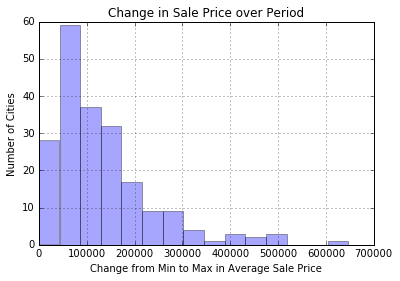

In [19]:
fig, ax = plt.subplots()
spdelta.hist(bins=15, ax=ax, alpha=0.35)
ax.set_xlabel('Change from Min to Max in Average Sale Price')
ax.set_ylabel('Number of Cities')
ax.set_title('Change in Sale Price over Period')

ymin, ymax = ax.get_ylim()

In [20]:
spdelta.sort_values(ascending=False)[:20]

RegionName
San Jose, CA           647200.000000
San Francisco, CA      504350.000000
Santa Cruz, CA         491516.666667
Kapaa, HI              477166.666667
Napa, CA               438291.666667
Salinas, CA            433700.000000
Kahului, HI            430340.683333
Ventura, CA            412600.000000
San Luis Obispo, CA    391591.666667
Santa Rosa, CA         372583.333333
San Diego, CA          342633.333333
Hilo, HI               322948.516667
Vallejo, CA            319094.000000
Stockton, CA           313507.800000
Stamford, CT           297193.116667
Riverside, CA          292766.666667
Sacramento, CA         281216.666667
Merced, CA             278783.333333
New York, NY           270083.333333
Modesto, CA            270066.666667
dtype: float64

We can see here that among the top 20 of the highest rising metro areas in terms of average sale price, that Calfornia and Hawaii both had the areas with the greatest apprecation in terms of home values. Also of interest, Silicon Valley/San Francisco metro areas have seen their sale prices rising more than twice that of New York from their minimum to the maximum over the time period of the data set.

### After sale price change it would make sense to look at foreclosure rates -Drew

# Graph Analysis

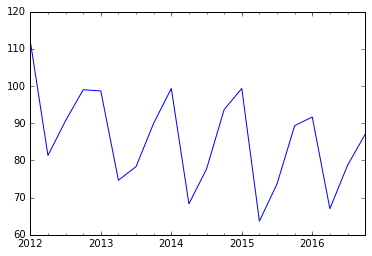

In [21]:
inv_age2 = inv_age
inv_age2.head(5)
inv_age2 = inv_age2.T
inv_age2['United States'].plot()

The average age of a first time home buyer in the US is 33. On average women give birth to their first child at age 26 and men father their first child at age 27. Being a parent with school age children can create a friction and added consideration to moving. Therefore, we believe there is a correlation between the American public school calendar and home purchases, resulting in increased demand during the summer months and lowering inventory.

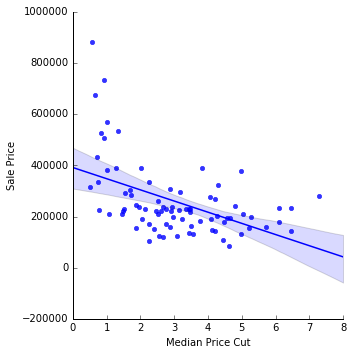

In [22]:
sns.lmplot(x="Median Price Cut", y="Sale Price", data=Q2_2016)

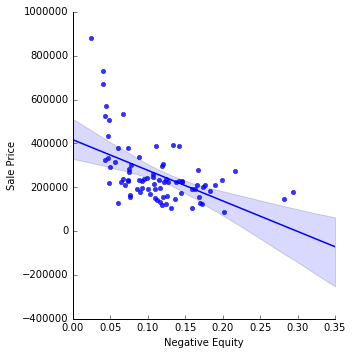

In [23]:
sns.lmplot(x="Negative Equity", y="Sale Price", data=Q2_2016)

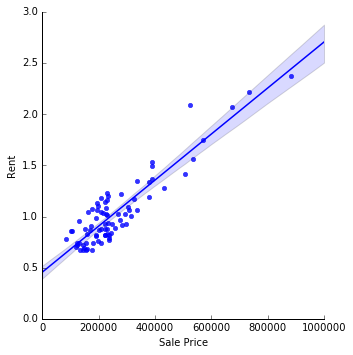

In [24]:
sns.lmplot(x="Sale Price", y="Rent", data=Q2_2016)

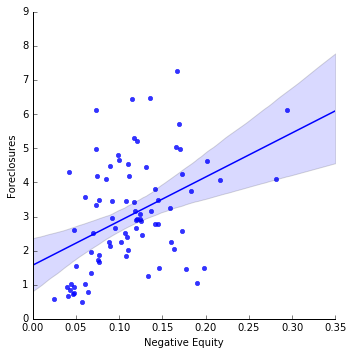

In [25]:
sns.lmplot(x="Negative Equity", y="Foreclosures", data=Q2_2016)

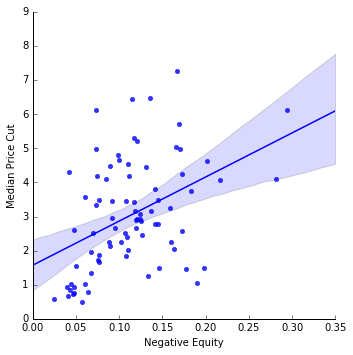

In [26]:
sns.lmplot(x="Negative Equity", y="Median Price Cut", data=Q2_2016)